<a href="https://colab.research.google.com/github/pikey-msc/ValOpc/blob/main/2024-2/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación Montecarlo

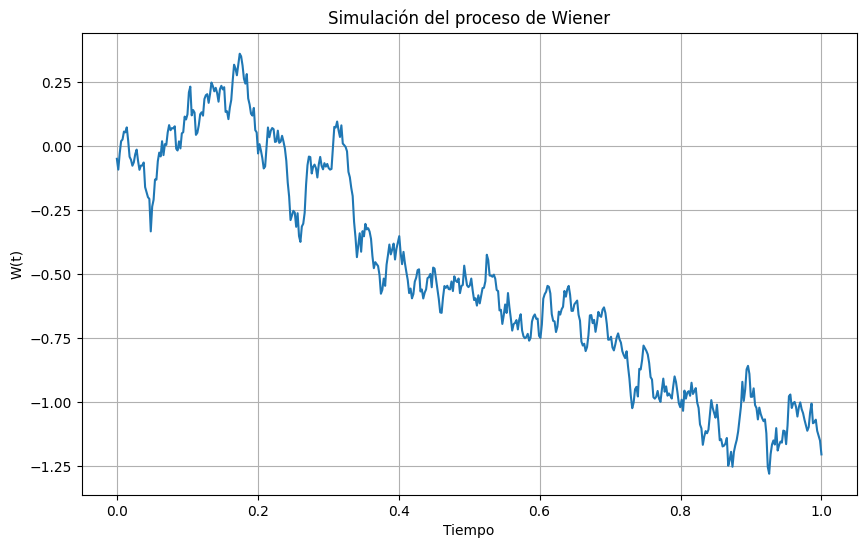

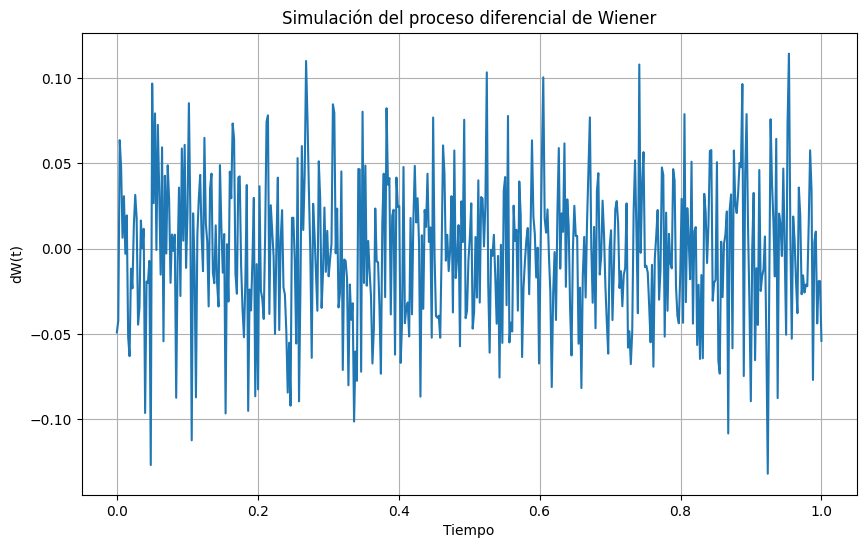

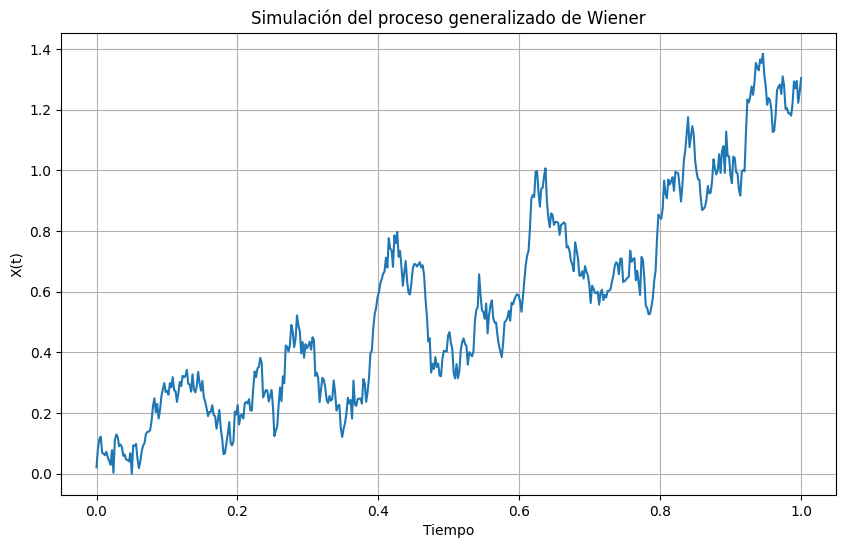

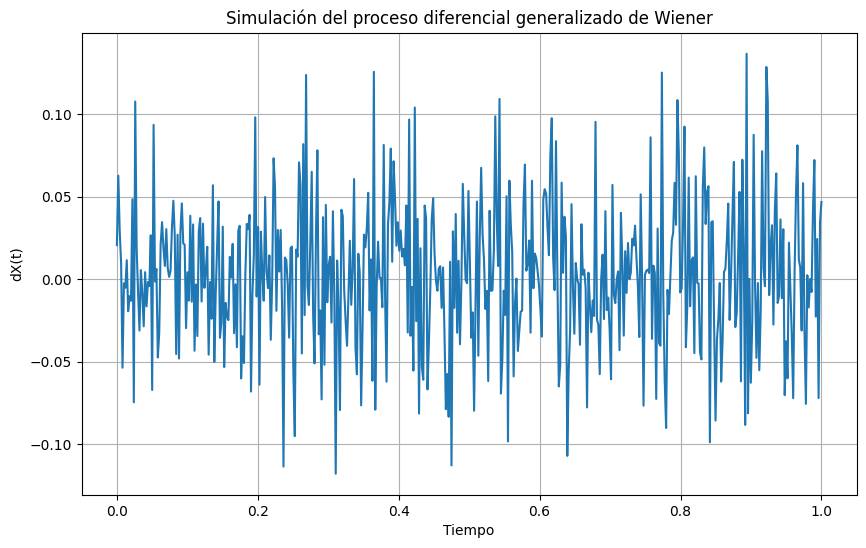

In [ ]:
# Importando las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulación del proceso de Wiener
def wiener_process(T, N):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    W = np.cumsum(dW)
    return W, dW

T = 1.0  # tiempo total
N = 500  # número de pasos
W, dW = wiener_process(T, N)

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), W)
plt.title('Simulación del proceso de Wiener')
plt.xlabel('Tiempo')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), dW)
plt.title('Simulación del proceso diferencial de Wiener')
plt.xlabel('Tiempo')
plt.ylabel('dW(t)')
plt.grid(True)
plt.show()

# 2. Simulación del proceso generalizado de Wiener
def generalized_wiener_process(T, N, a, b):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    dX = a*dt + b*dW
    X = np.cumsum(dX)
    return X, dX

a = 0.5  # parámetro a
b = 1.0  # parámetro b
X, dX = generalized_wiener_process(T, N, a, b)

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), X)
plt.title('Simulación del proceso generalizado de Wiener')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), dX)
plt.title('Simulación del proceso diferencial generalizado de Wiener')
plt.xlabel('Tiempo')
plt.ylabel('dX(t)')
plt.grid(True)
plt.show()



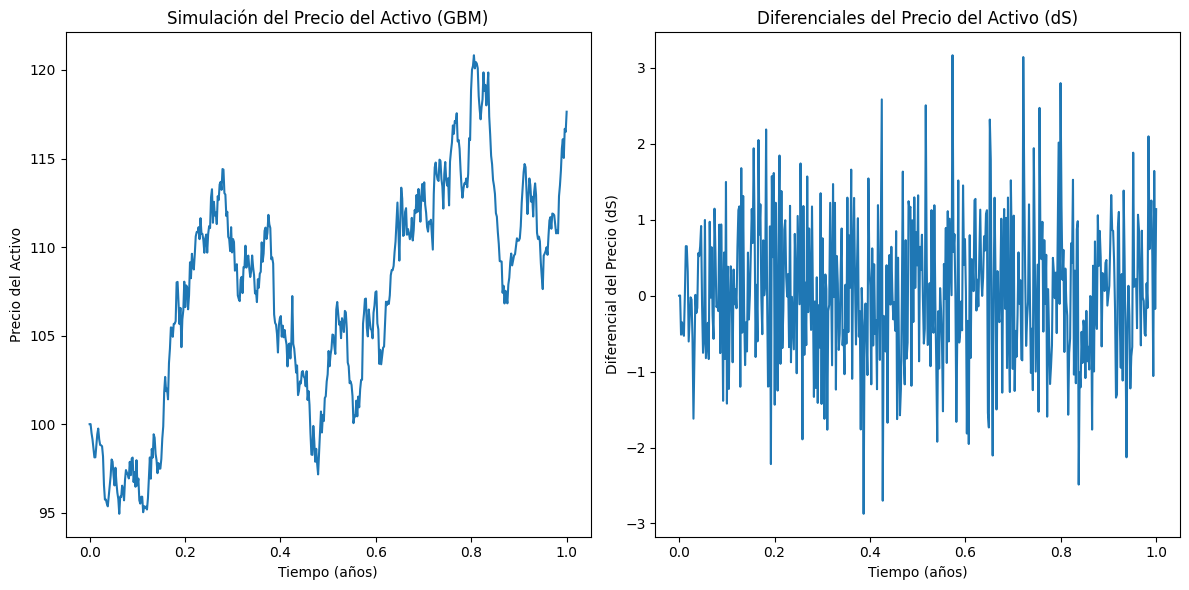

In [ ]:
def geometric_brownian_motion(T, N, mu, sigma, S0):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    S = np.empty(N)
    dS = np.empty(N)
    S[0] = S0  # valor inicial
    for t in range(1, N):
        dS[t] = S[t-1] *  ( mu*dt + sigma*dW[t])
        S[t] = S[t-1] + dS[t]
    return S, dS

mu = 0.1  # tasa de retorno esperada
sigma = 0.2  # volatilidad
S, dS = geometric_brownian_motion(T, N, mu, sigma, 100)

# Gráficos de S y dS
plt.figure(figsize=(12, 6))

t = np.linspace(0, T, N)  # Vector de tiempo

plt.subplot(1, 2, 1)
plt.plot(t, S)
plt.title("Simulación del Precio del Activo (GBM)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Precio del Activo")

plt.subplot(1, 2, 2)
plt.plot(t, dS)
plt.title("Diferenciales del Precio del Activo (dS)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Diferencial del Precio (dS)")

plt.tight_layout()
plt.show()

## Generación números aleatorios método bien básicote

[0.046682196436449885, 0.9354269695468247, 0.12693221983499825, 0.668583040125668, 0.6948939224239439, 0.8898876770399511, 0.8303439787123352, 0.5545973721891642, 0.15726449037902057, 0.5288799391128123, 0.25741148297674954, 0.8866303851827979, 0.8251401165034622, 0.09640824375674129, 0.7349953989032656, 0.36033718660473824, 0.00900687905959785, 0.20958117442205548, 0.4626179833430797, 0.06159734074026346, 0.7642353472765535, 0.7402642420493066, 0.45100068137981, 0.3886950444430113, 0.29006739775650203, 0.7035686546005309, 0.9479064114857465, 0.42664774041622877, 0.41747021838091314, 0.4813010240904987, 0.7419115381781012, 0.47680816799402237, 0.45148249971680343, 0.458499011117965, 0.4847325321752578, 0.1948648514226079, 0.3836778139229864, 0.901177906896919, 0.922732318053022, 0.5403660256415606, 0.24037018115632236, 0.6534131527878344, 0.6782313094008714, 0.4908919995650649, 0.08218682347796857, 0.9818837973289192, 0.9712481314782053, 0.2240009568631649, 0.9206331062596291, 0.646001

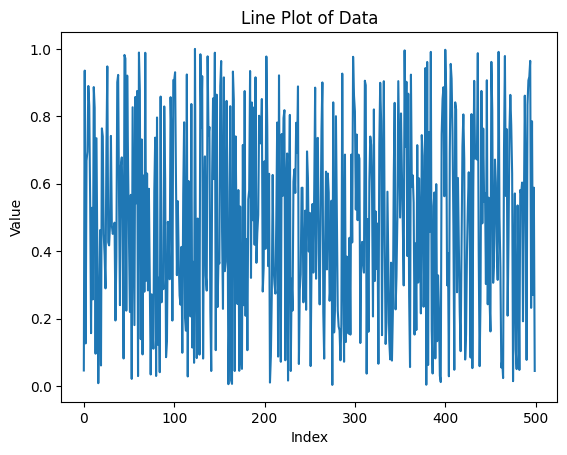

In [ ]:
def linear_congruential_generator(a, c, m, x0, n, ind):
    """
    Genera una secuencia de números pseudoaleatorios usando un generador lineal congruencial.

    Parámetros:
        a (int): multiplicador que vaya en función de 4*j +1.
        c (int): incremento que sea non.
        m (int): módulo grandísimo algo del orden 2^k (k>31).
        x0 (int): valor inicial (semilla).
        n (int): número de valores a generar.

    Retorna:
        list: secuencia de números pseudoaleatorios.
    """
    x = x0
    random_numbers = []
    for _ in range(n):
        x = (a * x + c) % m
        if ind == 0:
          random_numbers.append(x)
        else:
          random_numbers.append(x/m)
    return random_numbers

# Parámetros del GLC
a = 21877685
c = 573578632523
m = 2**32
x0 = 2**31  # Semilla inicial

# Generar 10 números pseudoaleatorios
random_sequence = linear_congruential_generator(a, c, m, x0, 500, 1)

# Mostrar los números generados
print(random_sequence)
distinct_values = set(random_sequence)
import itertools
grouped_data = itertools.groupby(random_sequence, key=lambda x: x)


# Create a line plot
plt.plot(random_sequence)
plt.xlabel("Index")  # Label the x-axis
plt.ylabel("Value")  # Label the y-axis
plt.title("Line Plot of Data")  # Set the plot title
plt.show()  # Display the plot

## CuasiMontecarlo básico

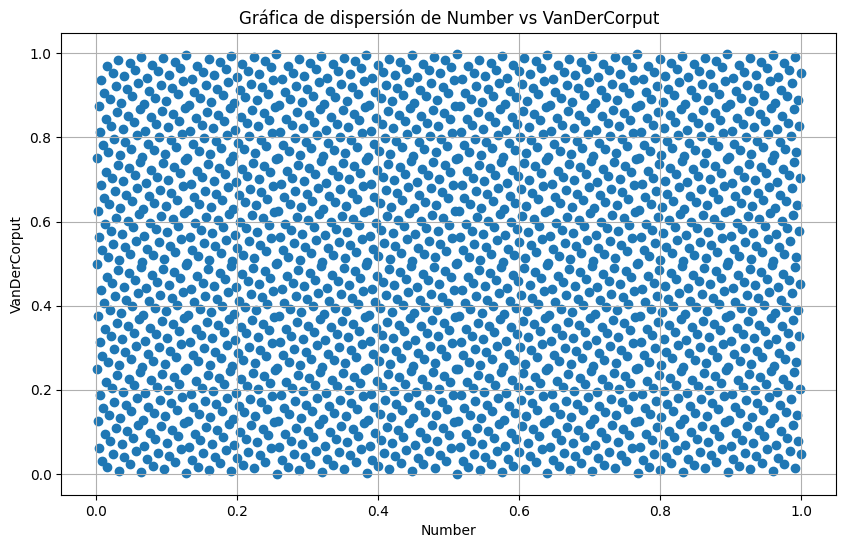

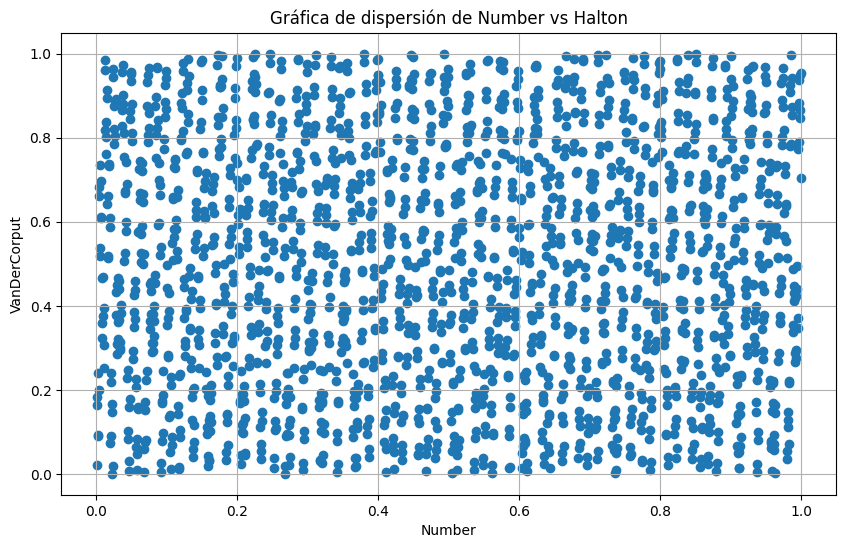

In [ ]:
import pandas as pd

# Función para convertir un número a binario y sumar los dígitos

def binario_a_decimal(binario):
    longitud = len(binario)  # Longitud del número binario
    decimal = 0
    for i in range(longitud):
        digito = int(binario[i])  # Convierte el carácter en un entero (0 o 1)
        potencia = longitud - i - 1  # Calcula la potencia de 2 correspondiente
        decimal += digito * (2 ** potencia)
    return decimal

def decimal_a_binario(numero):
    if numero == 0:
        return "0"
    binario = ""
    while numero > 0:
        resto = numero % 2
        binario = str(resto) + binario  # Prepend el resto para construir el número binario
        numero = numero // 2
    return binario

def van_der_corput(n, base=2):
    vdc, denom = 0, 1
    while n:
        denom *= base
        n, remainder = divmod(n, base)
        vdc += remainder / denom
    return vdc

def halton_sequence(n, base):
    result = 0
    f = 1
    i = n
    while i > 0:
        f = f / base
        result = result + f * (i % base)
        i = i // base
    return result

# Crear el DataFrame
N = 2000  # Cambia esto por el valor de N que necesites
df = pd.DataFrame({'Number': range(1, N+1)})
df['Prop'] = df['Number']/(N+1)
df['Binary'] = df['Number'].apply(lambda x: decimal_a_binario(x))
df['VanDerCorput'] = df['Binary'].apply(lambda x: van_der_corput(int(x, 2)))
df['VanDerCorputo'] = df['VanDerCorput'].apply(lambda x: int(x * 10**5))

# Calcular la secuencia de Halton para cada dimensión
for base in range(2, 6):  # Cambia esto para usar diferentes bases
    df[f'Halton_base_{base}'] = df['VanDerCorputo'].apply(lambda x: halton_sequence(x, base))

# df['Halton'] = df['Binary'].apply(lambda x: halton_sequence(int(x, 2), 2))
plt.figure(figsize=(10, 6))
plt.scatter(df['Prop'], df['VanDerCorput'])
plt.title('Gráfica de dispersión de Number vs VanDerCorput')
plt.xlabel('Number')
plt.ylabel('VanDerCorput')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Prop'], df['Halton_base_4'])
plt.title('Gráfica de dispersión de Number vs Halton')
plt.xlabel('Number')
plt.ylabel('VanDerCorput')
plt.grid(True)
plt.show()

## Cuasi Montecarlo Faure

   dim_1       x
0    0.0  0.0001
1    0.2  0.0002
2    0.6  0.0003
3    0.4  0.0004
4    0.8  0.0005


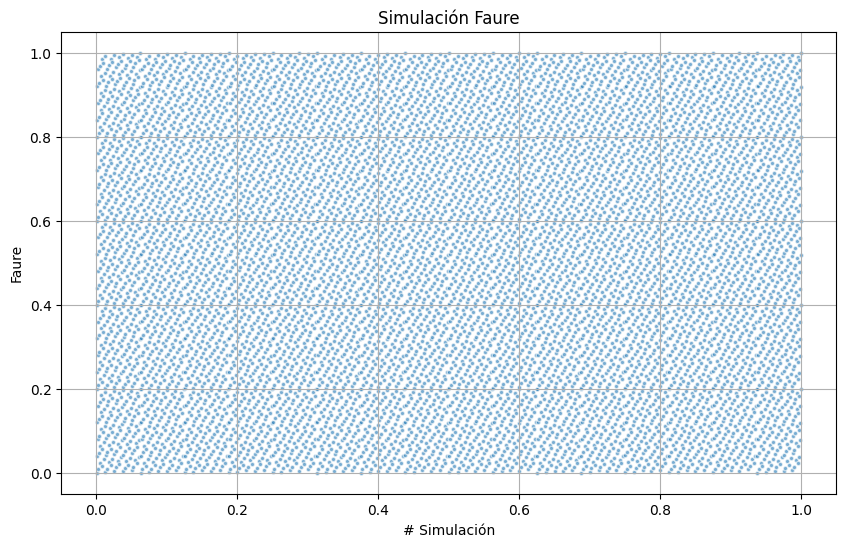

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

def faure_permutation(b):
    perm = list(range(b))
    for i in range(1, b):
        j = factorial(i).astype(int) % (i + 1)
        perm[i], perm[j] = perm[j], perm[i]
    return perm

def faure_number(n, b, perm):
    digits = []
    while n > 0:
        n, remainder = divmod(n, b)
        digits.append(perm[remainder])
    result = 0
    for digit in reversed(digits):
        result = result / b + digit / b
    return result

def generate_faure_dataframe(N, b, dimensions):
    perm = faure_permutation(b)
    data = pd.DataFrame([])
    for i in range(dimensions):
      data[f'dim_{i+1}'] = pd.DataFrame( [faure_number(n, b, perm) for n in range(N)] )
    data['x'] =  pd.DataFrame( range(1, N+1))/(N+1)
    return data

# Generar DataFrame
b = 5  # Base
N = 10000  # Número de puntos
dimensions = 1  # Dimensiones para la visualización
df_faure = generate_faure_dataframe(N, b, dimensions)

print(df_faure.head())

plt.figure(figsize=(10, 6))
plt.scatter(df_faure['x'], df_faure['dim_1'], alpha=0.6, edgecolors='w', s=10)
plt.title('Simulación Faure')
plt.xlabel('# Simulación')
plt.ylabel('Faure')
plt.grid(True)
plt.show()


## Sobol

   dim_1  dim_2         x
0  0.000  0.000  0.000061
1  0.500  0.500  0.000122
2  0.750  0.250  0.000183
3  0.250  0.750  0.000244
4  0.375  0.375  0.000305


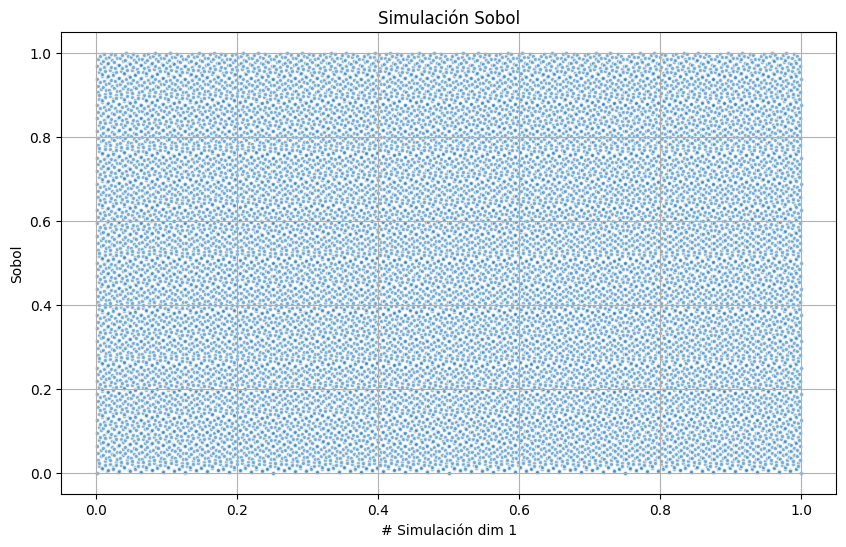

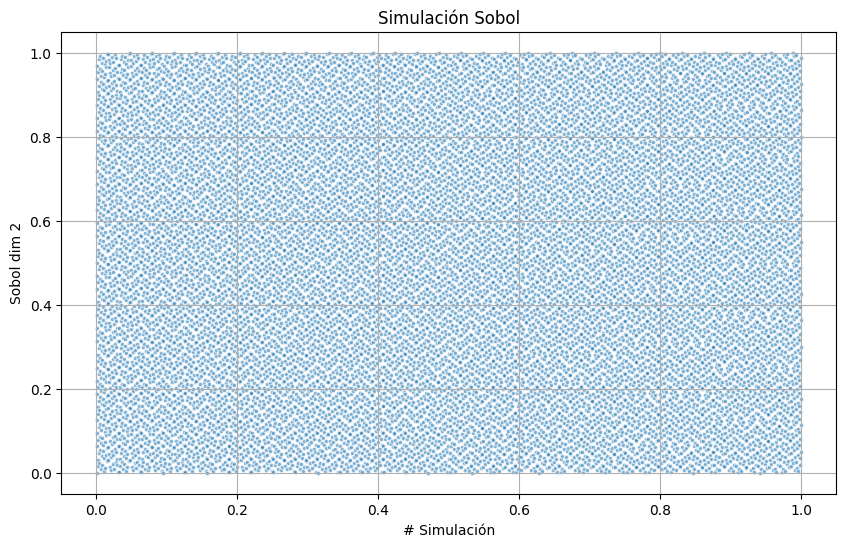

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.qmc import Sobol

def generate_sobol(dimensions, N):
    # Crea una instancia del generador Sobol
    sobol_gen = Sobol(d=dimensions, scramble=False)
    # Genera muestras
    points = sobol_gen.random_base2(m=int(np.log2(N)))
    data = pd.DataFrame(points, columns=[f'dim_{i+1}' for i in range(dimensions)])
    data['x'] =  pd.DataFrame( range(1, N+1))/(N+1)
    return data

# Configuración de parámetros
dimensions = 2  # Dos dimensiones para la visualización de dispersión
samples = 2**14  # Número de puntos; preferiblemente una potencia de 2

# Generar DataFrame
df_sobol = generate_sobol(dimensions, samples)
print(df_sobol.head(5))

plt.figure(figsize=(10, 6))
plt.scatter(df_sobol['x'], df_sobol['dim_1'], alpha=0.6, edgecolors='w', s=10)
plt.title('Simulación Sobol')
plt.xlabel('# Simulación dim 1')
plt.ylabel('Sobol')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df_sobol['x'], df_sobol['dim_2'], alpha=0.6, edgecolors='w', s=10)
plt.title('Simulación Sobol')
plt.xlabel('# Simulación')
plt.ylabel('Sobol dim 2')
plt.grid(True)
plt.show()


## Cuasi Montecarlo Aleatorizado

      dim_1     dim_2         x
0  0.535750  0.246087  0.000061
1  0.199978  0.766743  0.000122
2  0.286643  0.302274  0.000183
3  0.951021  0.718125  0.000244
4  0.864254  0.444684  0.000305


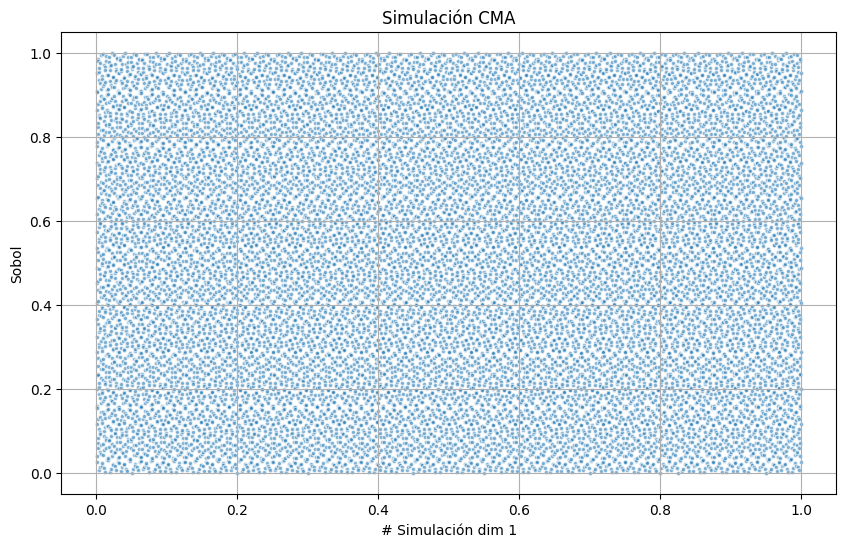

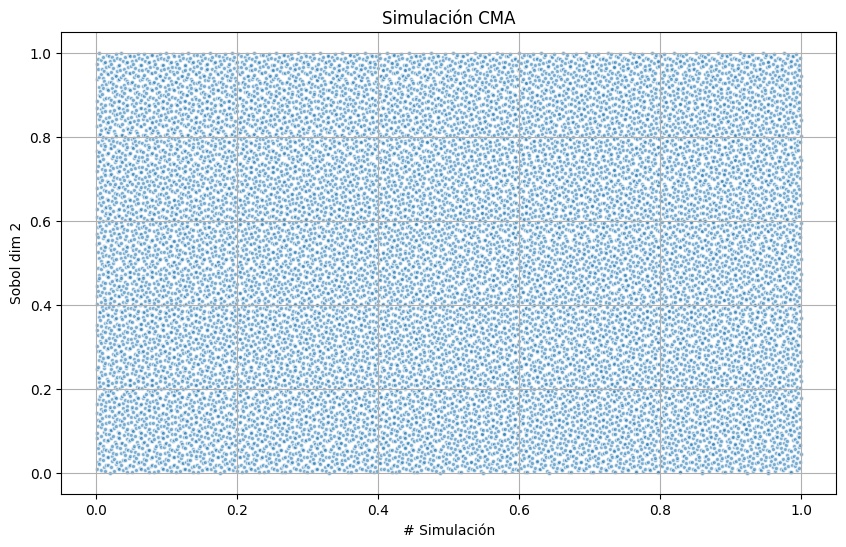

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.qmc import Sobol

def generate_cma(dimensions, N):
    # Crea una instancia del generador Sobol
    sobol_gen = Sobol(d=dimensions, scramble=True)
    # Genera muestras
    points = sobol_gen.random_base2(m=int(np.log2(N)))
    data = pd.DataFrame(points, columns=[f'dim_{i+1}' for i in range(dimensions)])
    data['x'] =  pd.DataFrame( range(1, N+1))/(N+1)
    return data

# Configuración de parámetros
dimensions = 2  # Dos dimensiones para la visualización de dispersión
N = 2**14  # Número de puntos; preferiblemente una potencia de 2

# Generar DataFrame
df_sobol = generate_cma(dimensions, N)
print(df_sobol.head(5))

plt.figure(figsize=(10, 6))
plt.scatter(df_sobol['x'], df_sobol['dim_1'], alpha=0.6, edgecolors='w', s=10)
plt.title('Simulación CMA')
plt.xlabel('# Simulación dim 1')
plt.ylabel('Sobol')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df_sobol['x'], df_sobol['dim_2'], alpha=0.6, edgecolors='w', s=10)
plt.title('Simulación CMA')
plt.xlabel('# Simulación')
plt.ylabel('Sobol dim 2')
plt.grid(True)
plt.show()


##Bootstrap

[*********************100%%**********************]  1 of 1 completed


                Close
Date                 
2023-03-10  18.329639
2023-03-13  18.317030
2023-03-14  18.919081


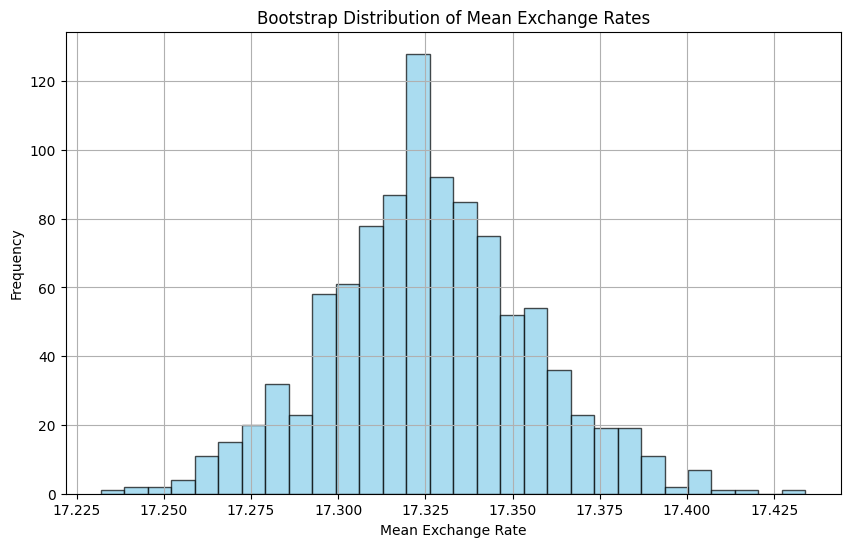

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame y contiene una columna 'Exchange Rate'
# Aquí un ejemplo de cómo podrías crear un DataFrame de muestra

# !pip install yfinance
import yfinance as yf

SymbolsFX = ["USDMXN=X"] #tienen que ir en orden alfabético
from datetime import datetime, timedelta

start_date = datetime.strptime("20230310", "%Y%m%d") #Fecha de valoración
# symbol = ['AAPL','MSFT','SQ','AMZN','USDMXN=X']
data = yf.download(SymbolsFX,start_date)
data=pd.DataFrame(data.Close.dropna())
print(data.head(3))


def bootstrap(data, n=1000):
    """ Realiza bootstrap re-muestreando los datos y calcula la media para cada muestra. """
    np.random.seed(0)
    sample_means = []
    for _ in range(n):
        sample = np.random.choice(data, replace=True, size=len(data))
        sample_means.append(np.mean(sample))
    return sample_means

# Realizar el bootstrap
sample_means = bootstrap(data['Close'], n=1000)

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Mean Exchange Rates')
plt.xlabel('Mean Exchange Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
print(data.tail(10))

                Close
Date                 
2024-05-01  17.149920
2024-05-02  16.928600
2024-05-03  16.961700
2024-05-06  16.980261
2024-05-07  16.883341
2024-05-08  16.904060
2024-05-09  16.916010
2024-05-10  16.779499
2024-05-13  16.767200
2024-05-14  16.795000


## Box - Muller

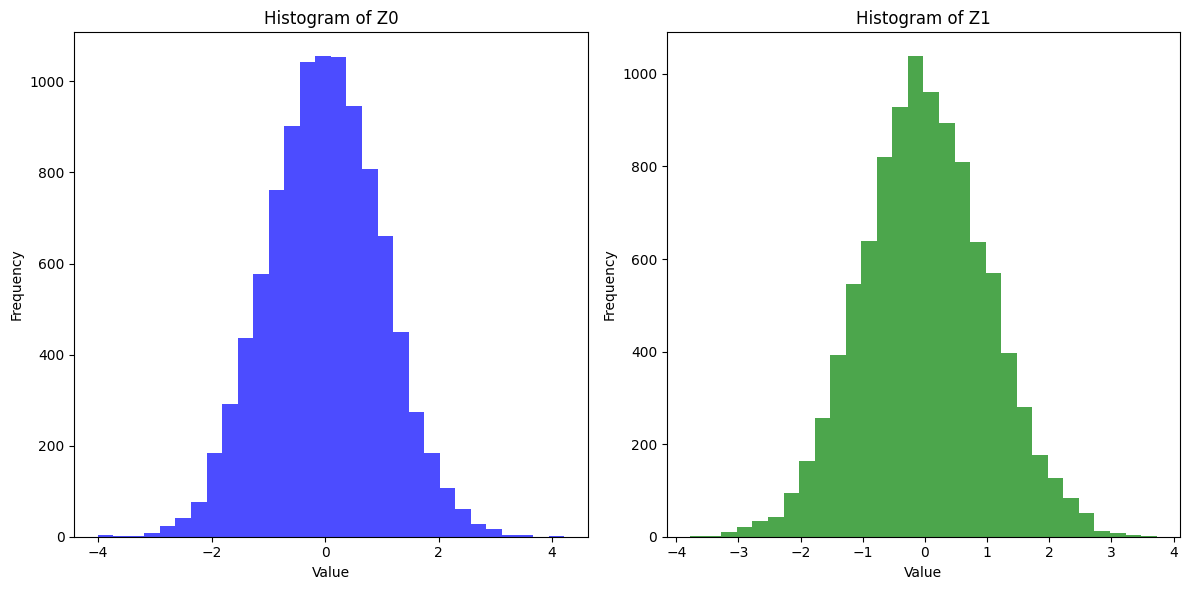

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller_transform(samples):
    # Paso 1: Generar muestras de dos números aleatorios uniformes
    U1 = np.random.uniform(low=0.0, high=1.0, size=samples)
    U2 = np.random.uniform(low=0.0, high=1.0, size=samples)

    # Paso 2: Aplicar transformaciones de Box-Muller
    R = np.sqrt(-2.0 * np.log(U1))
    theta = 2 * np.pi * U2

    Z0 = R * np.cos(theta)
    Z1 = R * np.sin(theta)

    return Z0, Z1

# Generar 1000 muestras
Z0, Z1 = box_muller_transform(10000)

# Visualizar la distribución de las muestras generadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Z0, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Z0')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Z1, bins=30, alpha=0.7, color='green')
plt.title('Histogram of Z1')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##Estratificado

In [29]:
import numpy as np
import pandas as pd

# Paso 1: Crear un DataFrame con datos simulados
# np.random.seed(0)
n_students = 10000
data = {
    'student_id': range(n_students),
    'faculty': np.random.choice(['Sciences', 'Humanities', 'Engineering'], size=n_students, p=[0.4, 0.3, 0.3]),
    'expenditure': np.concatenate([np.random.normal(300, 50, size=int(n_students*0.4)),
                                  np.random.normal(200, 30, size=int(n_students*0.3)),
                                  np.random.normal(400, 80, size=int(n_students*0.3))])
}

df = pd.DataFrame(data)
print("Estimación de gasto promedio real:", data['expenditure'].mean())

# Paso 2: Asignar un número aleatorio uniforme a cada registro
df['uniform'] = np.random.uniform(low=0, high=1, size=n_students)

# Paso 3: Estratificar los datos y seleccionar manualmente las muestras
frac = 0.1  # Fracción de la muestra de cada estrato

# Función para seleccionar muestras basadas en los números uniformes
def select_samples(group, frac):
    threshold = group['uniform'].quantile(1 - frac)  # Define un umbral para seleccionar el frac% más alto de números
    return group[group['uniform'] >= threshold]

stratified_sample = df.groupby('faculty').apply(select_samples, frac=frac).reset_index(drop=True)

# Paso 4: Calcular la estimación de gasto promedio
mean_expenditure_stratified = stratified_sample['expenditure'].mean()
print("Estimación de gasto promedio con estratificación manual:", mean_expenditure_stratified)


Estimación de gasto promedio real: 300.36822385387444
Estimación de gasto promedio con estratificación manual: 300.249468935681


# Opciones: Simulación Montecarlo

## Europea

In [39]:

def bm_europea(S, K, t, r, v, q, n_iteraciones, n_simulaciones, z):
    dT = t / n_iteraciones
    valor_opcion = 0
    for _ in range(n_simulaciones):
        St = S
        for _ in range(n_iteraciones):
            Z = np.random.normal()  # Generar una muestra normal estándar
            St *= np.exp((r - q - 0.5 * v**2) * dT + v * Z * np.sqrt(dT))
        # Calcular el payoff para esta simulación y acumularlo
        valor_opcion += max((St - K)*(-1)**z, 0)

    # Calcular el precio promedio de la opción y descontarlo al presente
    return valor_opcion / n_simulaciones * np.exp(-r * t)

# Parámetros de ejemplo
S = 100  # Precio inicial del activo
K = 95   # Precio de ejercicio
t = 1    # Tiempo hasta la madurez de la opción en años
r = 0.05 # Tasa de interés libre de riesgo
v = 0.2  # Volatilidad del activo subyacente
q = 0.00 # Tasa de dividendos continua
z = 0
n_iteraciones = 100
n_simulaciones = 10000

# Llamada a la función
precio = bm_europea(S, K, t, r, v, q, n_iteraciones, n_simulaciones, 0)
print("Precio estimado de la opción europea:", precio)


Precio estimado de la opción europea: 13.488895019491423


## Americana

In [41]:

def bm_americana(S, K, t, r, v, q, n_iteraciones, n_simulaciones, z):
    dT = t / n_iteraciones
    valor_opcion_am = 0

    for _ in range(n_simulaciones):
        St = S
        valor_maximo = 0  # Almacena el máximo valor del ejercicio anticipado
        for _ in range(n_iteraciones):
            Z = np.random.normal()  # Generar una muestra normal estándar
            St *= np.exp((r - q - 0.5 * v**2) * dT + v * Z * np.sqrt(dT))
            valor_ejercicio = max((St - K)*(-1)**z, 0)
            valor_maximo = max(valor_maximo, valor_ejercicio)  # Actualiza el máximo valor encontrado

        # Acumula el máximo valor encontrado en cada simulación
        valor_opcion_am += valor_maximo

    # Calcular el precio promedio de la opción y descontarlo al presente
    precio_promedio = valor_opcion_am / n_simulaciones
    return precio_promedio * np.exp(-r * t)


# Parámetros de ejemplo
S = 100  # Precio inicial del activo
K = 95   # Precio de ejercicio
t = 1    # Tiempo hasta la madurez de la opción en años
r = 0.05 # Tasa de interés libre de riesgo
v = 0.2  # Volatilidad del activo subyacente
q = 0.00 # Tasa de dividendos continua
z = 0
n_iteraciones = 100
n_simulaciones = 10000

# Llamada a la función
precio = bm_americana(S, K, t, r, v, q, n_iteraciones, n_simulaciones, 0)
print("Precio estimado de la opción americana:", precio)

Precio estimado de la opción americana: 22.738083301760888


## Lookback

In [ ]:

def bm_lookback(S, K, t, r, v, q, n_iteraciones, n_simulaciones, z):
    dT = t / n_iteraciones
    valor_opcion = 0

    for _ in range(n_simulaciones):
        St = S
        Sfinal = S
        for _ in range(n_iteraciones):
            Z = np.random.normal()  # Generar una muestra normal estándar
            St *= np.exp((r - q - 0.5 * v**2) * dT + v * Z * np.sqrt(dT))
            if z==0:
              Sfinal = max(St, Sfinal)  # Actualizar el máximo valor alcanzado
            else:
              Sfinal = min(St, Sfinal)  # Actualizar el máximo valor alcanzado
        # Calcular el payoff para esta simulación y acumularlo
        if z==0:
          valor_opcion += max(Sfinal - K, 0)
        else:
          valor_opcion += min(K-Sfinal, 0)

    # Calcular el precio promedio de la opción y descontarlo al presente
    return valor_opcion / n_simulaciones * np.exp(-r * t)

# Parámetros de ejemplo
S = 100  # Precio inicial del activo
K = 95   # Precio de ejercicio
t = 1    # Tiempo hasta la madurez de la opción en años
r = 0.05 # Tasa de interés libre de riesgo
v = 0.2  # Volatilidad del activo subyacente
q = 0.01 # Tasa de dividendos continua
z = 0
n_iteraciones = 100
n_simulaciones = 10000

# Llamada a la función
precio = bm_lookback(S, K, t, r, v, q, n_iteraciones, n_simulaciones, 0)
print("Precio estimado de la opción de compra lookback:", precio)


## Asiáticas

In [42]:
def bm_asiatica(S, K, t, r, v, q, n_iteraciones, n_simulaciones, z):
    dT = t / n_iteraciones
    valor_opcion = 0

    for _ in range(n_simulaciones):
        S_acum = 0
        St = S
        for _ in range(n_iteraciones):
            # Generar un incremento con el método de Box-Muller equivalente
            Z = np.random.normal()  # Z ~ N(0,1)
            St *= np.exp((r - q - 0.5 * v ** 2) * dT + v * Z * np.sqrt(dT))
            S_acum += St

        S_acum /= n_iteraciones
        valor_opcion += max(0, (S_acum - K)*(-1)**z)

    return valor_opcion / n_simulaciones * np.exp(-r * t)

# Ejemplo de uso de la función
S = 100  # Precio inicial del activo subyacente
K = 100  # Precio de ejercicio de la opción
t = 1    # Tiempo hasta la madurez de la opción en años
r = 0.05 # Tasa libre de riesgo anual
v = 0.2  # Volatilidad del activo subyacente
q = 0.01 # Tasa de dividendos continua
z = 0
n_iteraciones = 50
n_simulaciones = 10000

precio = bm_asiatica(S, K, t, r, v, q, n_iteraciones, n_simulaciones, z)
print("Precio de la opción de compra asiática:", precio)

Precio de la opción de compra asiática: 5.552025350978317
